<a href="https://colab.research.google.com/github/JuliaClabunde/Trabalho---IA-/blob/main/C%C3%B3pia_de_Trabalho_de_IA_N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
import seaborn as sns  # Seaborn é uma biblioteca de visualização de dados baseada no matplotlib.
import matplotlib.pyplot as plt  # biblioteca para criar gráficos em Python.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from ucimlrepo import fetch_ucirepo
import time

# Configuração de estilo do Seaborn
sns.set(style='whitegrid')

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
htru2 = fetch_ucirepo(id=372)

# data (as pandas dataframes)
X = htru2.data.features
y = htru2.data.targets.squeeze()

# metadata
#print(htru2.metadata)

# variable information
#print(htru2.variables)
X_trainfull, X_test, y_trainfull, y_test = train_test_split(X, y, train_size=6000, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_trainfull, y_trainfull, test_size=0.5, stratify=y_trainfull)

In [4]:
X

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [5]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
17893,0
17894,0
17895,0
17896,0


In [19]:
def classification_knn(X_train, X_val, X_test, y_train, y_val, y_test, k_values=[3, 5, 7, 9, 11]):
    # Inicializando listas para armazenar os resultados para plotagem
    accuracies = []
    precisions = []
    recalls = []
    # Variáveis para armazenar o melhor k
    best_k = None
    best_accuracy = 0

    for k in k_values:
        # Treinando o modelo KNN com o valor de k atual
        start_time = time.time()
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        execution_time = time.time() - start_time

        # Fazendo previsões no conjunto de teste
        y_test_pred = knn.predict(X_test)

        # Calculando as métricas de avaliação
        accuracy = accuracy_score(y_test, y_test_pred)
        if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k = k

        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)

        # Armazenando as métricas para plotagem posterior
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)

        # Imprimindo os resultados imediatamente após serem calculados
        print(f"\nResultados para k = {k}:")
        print(f"  Acurácia: {accuracy:.4f}")
        print(f"  Precisão: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  Tempo de Execução: {execution_time:.4f} segundos")
        print(f"  Número de Protótipos Usados: {len(X_train)}")


    # Calculando as médias
    print("-" * 30)
    print(f"Resultados Médios após os 5 valores de k:")
    print(f"Acurácia Média: {np.mean(accuracies):.4f}")
    print(f"Precisão Média: {np.mean(precisions):.4f}")
    print(f"Recall Médio: {np.mean(recalls):.4f}")

    # Treinando o modelo com o melhor k no conjunto de treino completo e avaliando no teste
    knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
    knn_best.fit(X_trainfull, y_trainfull)
    y_test_pred = knn_best.predict(X_test)

    # Calculando e printando as métricas no conjunto de teste
    print("-" * 30)
    print(f"Melhor k encontrado: {best_k}")
    print("Resultados no conjunto de teste final:")
    print(f"  Acurácia: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"  Precisão: {precision_score(y_test, y_test_pred):.4f}")
    print(f"  Recall: {recall_score(y_test, y_test_pred):.4f}")
    print(f"  Número de Protótipos Usados: {len(X_test)}")
    print("-" * 30)

    # Gráficos dos resultados
    plt.figure(figsize=(14, 6))

    # Gráfico da Acurácia
    plt.subplot(1, 3, 1)
    sns.lineplot(x=k_values, y=accuracies, marker='o', color= 'red')
    plt.title('Acurácia por Valor de k')
    plt.xlabel('Valor de k')
    plt.ylabel('Acurácia')

    # Gráfico da Precisão
    plt.subplot(1, 3, 2)
    sns.lineplot(x=k_values, y=precisions, marker='o', color='pink')
    plt.title('Precisão por Valor de k')
    plt.xlabel('Valor de k')
    plt.ylabel('Precisão')

    # Gráfico do Recall
    plt.subplot(1, 3, 3)
    sns.lineplot(x=k_values, y=recalls, marker='o', color='purple')
    plt.title('Recall por Valor de k')
    plt.xlabel('Valor de k')
    plt.ylabel('Recall')

    plt.tight_layout()
    plt.show()


Resultados para k = 3:
  Acurácia: 0.9717
  Precisão: 0.8792
  Recall: 0.8009
  Tempo de Execução: 0.0451 segundos
  Número de Protótipos Usados: 3000

Resultados para k = 5:
  Acurácia: 0.9721
  Precisão: 0.8964
  Recall: 0.7862
  Tempo de Execução: 0.0082 segundos
  Número de Protótipos Usados: 3000

Resultados para k = 7:
  Acurácia: 0.9726
  Precisão: 0.9081
  Recall: 0.7798
  Tempo de Execução: 0.0079 segundos
  Número de Protótipos Usados: 3000

Resultados para k = 9:
  Acurácia: 0.9729
  Precisão: 0.9182
  Recall: 0.7725
  Tempo de Execução: 0.0081 segundos
  Número de Protótipos Usados: 3000

Resultados para k = 11:
  Acurácia: 0.9731
  Precisão: 0.9221
  Recall: 0.7716
  Tempo de Execução: 0.0083 segundos
  Número de Protótipos Usados: 3000
------------------------------

Resultados Médios após os 5 valores de k:
Acurácia Média: 0.9725
Precisão Média: 0.9048
Recall Médio: 0.7822
------------------------------
Melhor k encontrado: 11
Resultados no conjunto de teste final:
  Ac

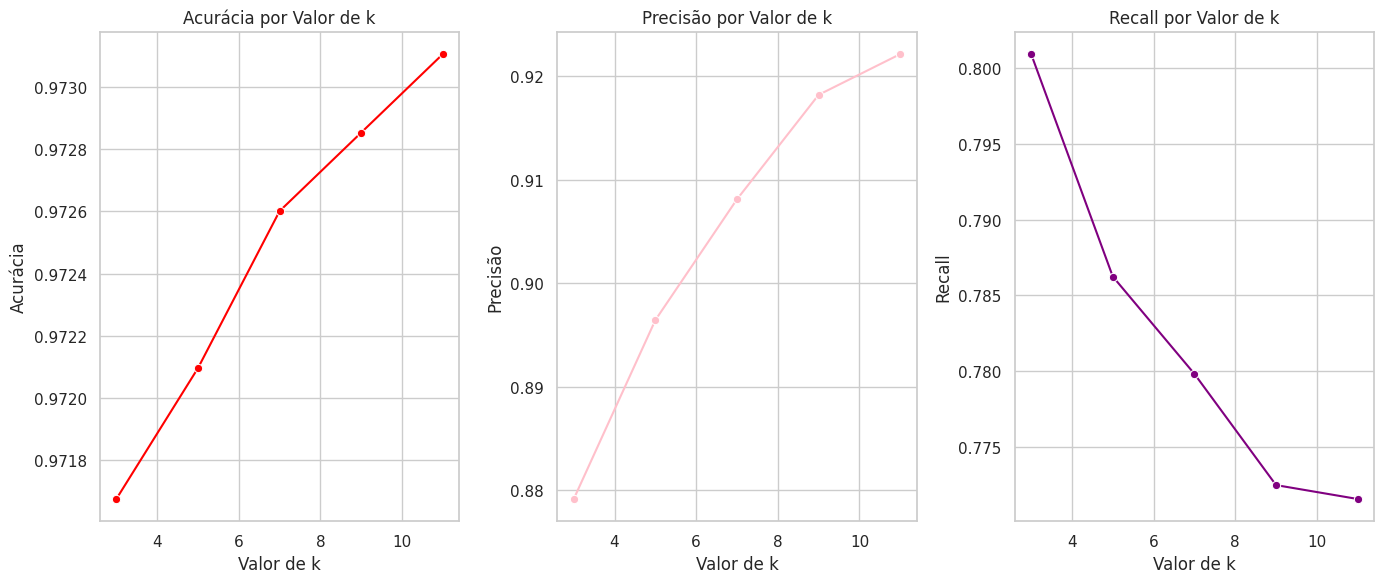

In [17]:
classification_knn(X_train, X_val, X_test, y_train, y_val, y_test)